<a href="https://colab.research.google.com/github/sukriyenursencan/Makine-Ogrenmesi/blob/master/Makine_ogrenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GÖĞÜS KANSERİ ÜZERİNE MAKİNE ÖĞRENMESİ MODELLERİ**

Göğüs kanseri (Breast Cancer), dünya çapında kadınlar arasında en yaygın kanserlerden biridir ve küresel istatistiklere göre yeni kanser vakalarının çoğunu ve kanserle ilişkili ölümleri temsil etmektedir. Günümüz toplumunda önemli bir halk sağlığı sorunu haline gelmektedir. Göğüs kanserinin erken teşhisi, hastalara zamanında klinik tedaviyi teşvik edebileceğinden hayatta kalma şansını önemli ölçüde artırabilir. İyi huylu tümörlerin daha doğru sınıflandırılması, gereksiz tedavilere giren hastaları önleyebilir. Bu nedenle, göğüs kanserinin doğru teşhisi ve hastaların malign(kötü huylu) veya benign(iyi huylu) gruplara sınıflandırılması çok fazla araştırmaya konu olmaktadır. Karmaşık göğüs kanseri veri kümelerinden kritik özelliklerin saptanmasında benzersiz avantajları nedeniyle, makine öğrenimi (ML), görüntü sınıflandırma ve tahmin modellemesinde tercih edilir. Sınıflandırma ve veri madenciliği yöntemleri, verileri sınıflandırmanın etkili bir yoludur. Özellikle bu yöntemler tıbbi alanda tanıya karar vermek için yaygın olarak kullanılır.
Burada da makine öğrenmesi yolu ile  göğüs kanserinin iyi huylu veya kötü huylu olup olmadığını sınıflandırmak amaçlanmıştır. Veri https://www.kaggle.com/uciml/breast-cancer-wisconsin-data adresinden çekilmiştir. Özellikler, bir göğüs kütlesinin sayısallaştırılmış bir görüntüsünden hesaplanır.

Özellik Bilgisi:

*  ID number 
*  Diagnosis (M = malignant, B = benign) 3-32)

Her hücre çekirdeği için on gerçek değerli özellik hesaplanır:

*  radius (mean of distances from center to points on the perimeter) 
*  texture (standard deviation of gray-scale values) 
*  perimeter 
*  area 
*  smoothness (local variation in radius lengths) 
*  compactness (perimeter^2 / area - 1.0) 
*  concavity (severity of concave portions of the contour) 
*  concave points (number of concave portions of the contour) 
*  symmetry 
*  fractal dimension ("coastline approximation" - 1)

Bu özelliklerin ortalama, standart hatası ve “en kötü” ya da en büyüğü (en büyük üç değerin ortalaması) her görüntü için hesaplanmış ve sonuç olarak 30 özellik elde edilmiştir.


# **Gerekli Kütüphaneler**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# warning library 
import warnings
warnings.filterwarnings("ignore")

## **Veri İmport**

In [ ]:
data = pd.read_csv("cancer.csv")

Data içerisinden analizde kullanılmayacak olan sütunlar çıkarılmıştır.

In [ ]:
data.drop(["Unnamed: 32", "id"], inplace = True, axis = 1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


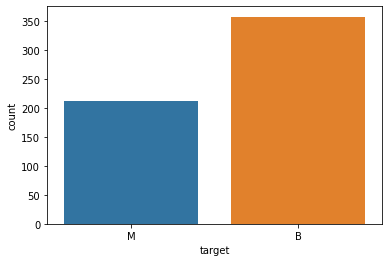

In [ ]:
data = data.rename(columns = { "diagnosis":"target"})
sns.countplot(data["target"]);

In [ ]:
print(data.target.value_counts())

B    357
M    212
Name: target, dtype: int64


Veri içerisinde 212 tane malign(kötü huylu) ve 357 tane benign(iyi huylu) gözlem bulunmaktadır.

In [ ]:
data["target"] = [1 if i.strip() == "M" else 0 for i in data.target]
data.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 31)

Veri 569 gözlem ve 31 değişkenden oluşmaktadır.

In [ ]:
# missing value'leri tespit etmenin en kolay yoludur.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Kayıp gözlem bulunmamaktadır.

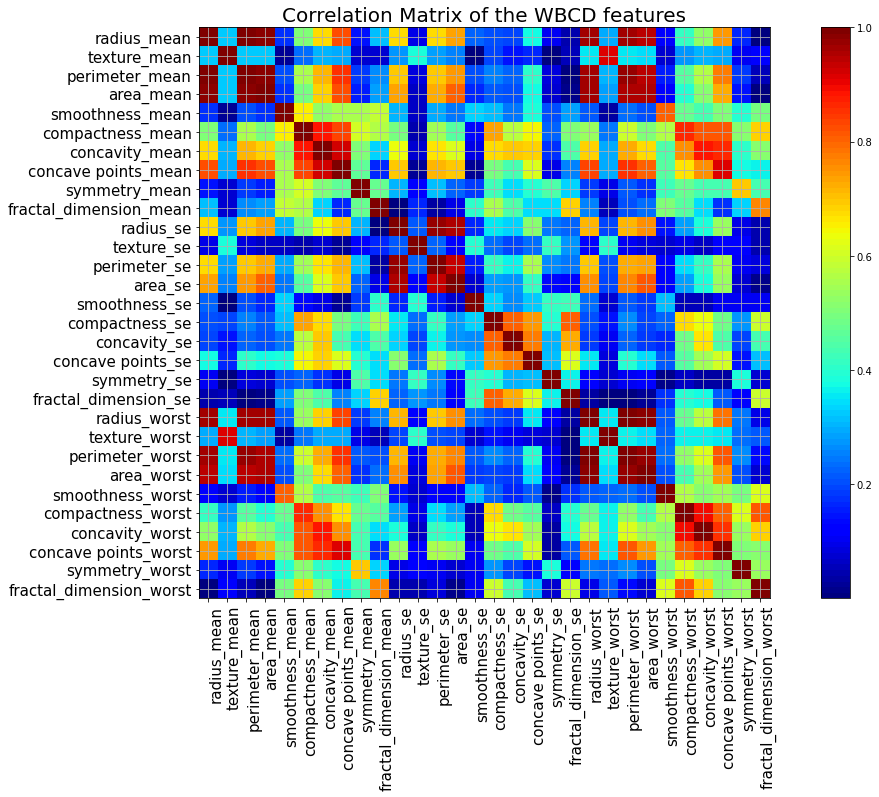

In [ ]:
# İki değişkenli analiz
# İlişki matrisi oluşturulmuştur.

def features_correlation_matrix(data):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    
    # interpolation='nearest' simply displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(data.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of the WBCD features',fontsize=20)
    labels=list(data.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
data_features = data.drop(data.columns[0],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(data_features)


Değişkenler arasındaki korelasyonların bazılarının belirgin şekilde olduğu gözlemlenmiştir(değerler 0.9'dan büyük). İki Değişkenli Analizin genel varsayımı, yüksek oranda ilişkilendirilen özelliklerin gereksiz bilgiler sağlamasıdır Bu nedenle korelasyonu 0.9'dan yüksek olan özellikler kaldırılmıştır. "To_drop" listesi,> 0,9 korelasyonlu on özelliği içerir. Bunlar aşağıdaki gibi listelenmiştir.

In [ ]:
# Dropping of features with a correlation greater than 0.9
# Create the correlation matrix with absolute values
corr_matrix = data_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

Bu özellikler DataFrame'den kaldılıp, kalan 20 değişken ile yeniden korelasyon grafiği çizdirilmiştir.

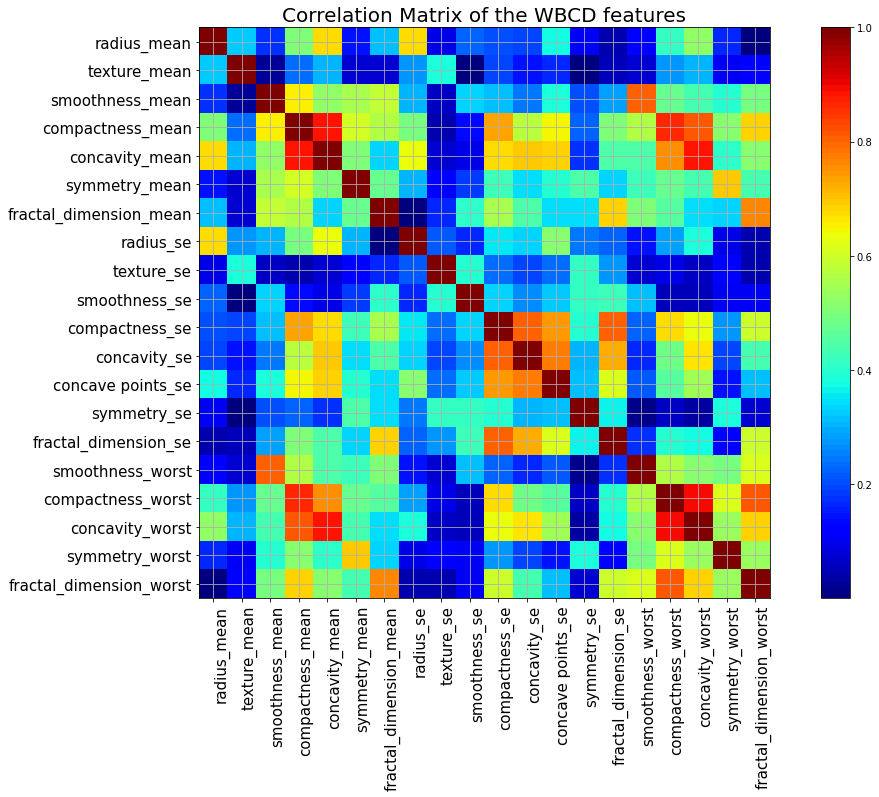

In [ ]:
# Drop the redundant features from the df
data_features_corr_dropped = data_features.drop(data_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(data_features_corr_dropped)

Çift Başına Görselleştirme ve İki Değişkenli Analiz sayesinde, analizde hangi özelliklerin dikkate alınması gerektiği öğrenilmiştir.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [ ]:
y = data.target
x = data.drop(["target"],axis = 1)

Veri setinde sonuç değişkeni yani Y bağımlı değişkeninin (M (Malign) veya B (Benign) olmak üzere iki değer kümesi vardır. Bu yüzden denetimli öğrenmenin sınıflandırma algoritları kullanılmıştır.

#**Lojistik Regresyon**

Bir sonucu belirleyen bir veya daha fazla bağımsız değişkenin bulunduğu bir veri kümesini analiz etmek için istatistiksel bir yöntemdir. Lojistik regresyonun amacı, bağımlı değişken veya sonuç değişkeni ile bir dizi bağımsız (yordayıcı veya açıklayıcı) değişken arasındaki ilişkiyi tanımlamak için en uygun modeli bulmaktır.Lojistik regresyon sınıflamaya yol açan faktörleri nicel olarak açıklar.

In [ ]:
# Lojistik Regresyon Model & Tahmin

In [ ]:
from sklearn.linear_model import LogisticRegression
loj_model = LogisticRegression(solver = "liblinear").fit(x,y)

In [ ]:
y_pred = loj_model.predict(x)
confusion_matrix(y, y_pred)

array([[348,   9],
       [ 14, 198]])

Confusion matrisine bakıldığında 569 tane veri içerisinden; 546 tanesinin doğru sınıflanıdırıldığı görülmektedir.

In [ ]:
accuracy_score(y, y_pred)

0.9595782073813708

In [ ]:
# Lojistik Regresyon: Model Tuning(Model Doğrulama)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.30,
                                                   random_state = 42)

In [ ]:
loj_model = LogisticRegression(solver = "liblinear").fit(x_train, y_train)

In [ ]:
y_pred = loj_model.predict(x_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9649122807017544


#**K-En Yakın Komşu**

K-en yakın komşu algoritması denetimli bir sınıflandırma algoritmasıdır. Sınıflandırılmış grup özelliklerini alır ve onları diğer özellikleri nasıl sınıflandıracağımızı öğrenmek için kullanır . Yeni bir özelliği etiketlemek için ,bu yeni özelliğe en yakındaki özelliklere bakar (bunlar yeni komşularıdır ), bu yeni komşuları oylar , böylece en çok komşusu sınıf hangisi ise sınıf için yeni özellik odur ( “ k” kontrol ettiği komşularının sayısıdır ).

In [ ]:
#K-En Yakın Komşu: Model & Tahmin

In [ ]:
knn_model = KNeighborsClassifier().fit(x_train, y_train)

In [ ]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9590643274853801

In [ ]:
#K- En Yakın Komşu: Model Tuning

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [ ]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(x_train, y_train)

In [ ]:
knn_cv_model.best_score_

0.9144871794871795

In [ ]:
#En iyi parametre bulunmuştur.
knn_cv_model.best_params_

{'n_neighbors': 6}

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors = 6).fit(x_train, y_train)

In [ ]:
y_pred = knn_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9532163742690059

In [ ]:
knn_tuned.score(x_test, y_test)

0.9532163742690059

#**Destek Vektör Makineleri(SVM)**
“Destek Vektör Makinesi” (SVM), sınıflandırma veya regresyon problemleri için kullanılabilen denetimli bir makine öğrenmesi algoritmasıdır. Bununla birlikte, çoğunlukla sınıflandırma problemlerinde kullanılır. Bu algoritmada, her bir veri maddesini belirli bir koordinatın değeri olan her özelliğin değeri ile birlikte n-boyutlu boşluğa (burada n sahip olduğunuz özelliklerin sayısı) bir nokta olarak çizilir. Ardından, iki sınıftan oldukça iyi ayrım yapan hiper-düzlemi bularak sınıflandırma gerçekleştirilir. Destek Vektörleri, sadece gözlemin koordinatlarıdır. Destek Vektör Makinesi, iki sınıfı (hiper düzlem / çizgi) en iyi ayıran bir sınırdır.

In [ ]:
#Destek Vektör Makineleri(SVM): Model & Tahmin

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear").fit(x_train, y_train)

In [ ]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [ ]:
#Destek Vektör Makine: Model Tuning

In [ ]:
svm = SVC()

In [ ]:
svm_params = {"C": np.arange(1,10), "kernel": ["linear","rbf"]}

In [ ]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.7min finished


In [ ]:
svm_cv_model.best_score_

0.9648101265822785

In [ ]:
svm_cv_model.best_params_

{'C': 7, 'kernel': 'linear'}

In [ ]:
# Final Model;

In [ ]:
svm_tuned = SVC(C = 7, kernel = "linear").fit(x_train, y_train)

In [ ]:
y_pred = svm_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9766081871345029

#**Naive Bayes**

Naive Bayes, yordayıcılar arasında bağımsızlık varsayımıyla Bayes Teoremine dayanan bir sınıflandırma tekniğidir. Naive Bayes sınıflandırması bir sınıfta başka özelliklerin yapısıyla bağlantısı olmayan belirli özelliklerin olduğunu varsayar. Bu özellikler diğerleri ile bağlı ya da birbirlerinin varlığına üzerine bağlı olsalar bile, bu özelliklerin hepsi bağımsız olasılıklara katkıda bulunur. Naive Bayes Modeli özellikle çok büyük veri kümeleri için kullanışlıdır,son derece karmaşık sınıflandırma yöntemlerinden daha iyi çalıştığı bilinir.

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
gaussianNB_model = classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[104,   4],
       [  6,  57]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9415204678362573

#**Gradient Boosting Machines(GBM)**

Gradyanla güçlendirilmiş makineler (GBM'ler), birçok alanda başarılı olduğu kanıtlanmış ve Kaggle yarışmalarını kazanmak için önde gelen yöntemlerden biri olan son derece popüler bir makine öğrenme algoritmasıdır. Rastgele ormanlar derin bağımsız ağaçlardan oluşan bir topluluk oluştururken, GBM'ler her ağacın bir öncekinde öğrenmesi ve gelişmesi ile sığ ve zayıf ardışık ağaçlardan oluşan bir topluluk oluşturur. Birleştirildiğinde, bu zayıf birbirini izleyen ağaçlar, diğer algoritmalarla yenilmesi zor olan güçlü bir komite üretir.

In [ ]:
#Gradient Boosting Machines(GBM): Model & Tahmin

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(x_train, y_train)

In [ ]:
y_pred = gbm_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9590643274853801

In [ ]:
#GBM: Model Tuning

In [ ]:
gbm = GradientBoostingClassifier()

In [ ]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
             "n_estimators": [100,300,500,1000],
             "max_depth": [2,3,5,8]}

In [ ]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  9.8min finished


In [ ]:
#En iyi parametreyi gösterir.
gbm_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}

In [ ]:
#final model
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 3, n_estimators = 300).fit(x_train, y_train)

In [ ]:
y_pred = gbm_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9590643274853801

#**Random Forest**

Rastgele Orman yöntemi oluşturulmak istenen ağaç sayısınca Sınıflandırma Ağacının veya amaca uygun olarak Regresyon Ağacının topluluklarından oluşmaktadır.Bu yüzden topluluk yöntemlerinden en yaygın olarak kullanılan algoritmalardan biri de Rastgele Ormandır. Yöntemin altında yatan temel fikir, çok sayıda tahminci ağaçlar arasından rastgele seçilen bir alt kümesi yardımıyla
topluluklar oluşturmaktır.

In [ ]:
#Random Forest: Model & Tahmin

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(x_train, y_train)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9707602339181286

In [ ]:
#Random Forest: Model Tuning

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [ ]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  7.3min finished


In [ ]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 5, 'n_estimators': 200}

In [ ]:
rf_tuned = RandomForestClassifier(max_features = 3, 
                                  min_samples_split = 5, 
                                  n_estimators = 200).fit(x_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9707602339181286

# **Tüm Modellerin Karşılaştırılması**

In [ ]:
modeller = [
    knn_tuned,
    loj_model,
    rf_tuned,
    svm_tuned,
    gbm_tuned,
    gaussianNB_model
    ]

sonuc = []
sonuclar = pd.DataFrame(columns = ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns = ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)

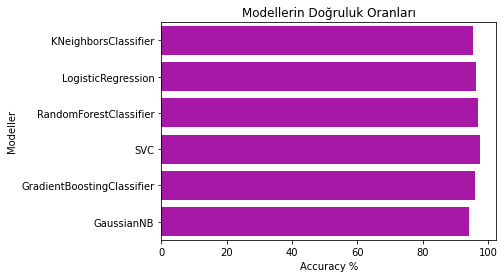

In [ ]:
sns.barplot(x = 'Accuracy', y = 'Modeller', data = sonuclar, color = "m")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [ ]:
sonuclar

,Modeller,Accuracy
0,KNeighborsClassifier,95.321637
0,LogisticRegression,96.491228
0,RandomForestClassifier,97.076023
0,SVC,97.660819
0,GradientBoostingClassifier,95.906433
0,GaussianNB,94.152047


Tüm uygulanan makine öğrenmesi sonuçlarına bakıldığında Rasgele Orman Sınıflandırma algoritması ve Destek Vektör Makineleri algoritmalarının veri setimiz için en iyi sonuçları verdiğini görebiliyoruz. Daha yüksek doğruluk oranına sahip olduğu için bu veri setinde Destek Vektör Makineleri modelini uygulamak diğer sınıflandırma modellerine kıyasla daha iyi ve doğru sonuçlar verecektir.

**Kaynakça:**

* https://towardsdatascience.com/logistic-regression-for-malignancy-prediction-in-cancer-27b1a1960184

* https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3

* https://medium.com/sifium/machine-learning-types-of-classification-9497bd4f2e14

* http://uc-r.github.io/gbm_regression

* https://medium.com/@sengul_krdrl/maki%CC%87ne-%C3%B6%C4%9Frenmesi%CC%87nde-siniflandirma-algori%CC%87tmasi-t%C3%BCrleri%CC%87-5e0f32245889

